### importing and Reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('../Data/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv')
df2 = pd.read_csv('../Data/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv')
df3 = pd.read_csv('../Data/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv')
df4 = pd.read_csv('../Data/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv')

In [3]:
df1.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [4]:
df4.tail()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
361103,29-12-2025,West Bengal,Uttar Dinajpur,733201,4,9
361104,29-12-2025,West Bengal,Uttar Dinajpur,733213,0,1
361105,29-12-2025,West Bengal,West Midnapore,721304,0,3
361106,29-12-2025,West Bengal,West Midnapore,721451,2,0
361107,29-12-2025,West Bengal,West Midnapore,721457,0,1


#### merging data


In [5]:
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)


In [6]:
df.shape

(1861108, 6)

In [7]:
df.tail()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
1861103,29-12-2025,West Bengal,Uttar Dinajpur,733201,4,9
1861104,29-12-2025,West Bengal,Uttar Dinajpur,733213,0,1
1861105,29-12-2025,West Bengal,West Midnapore,721304,0,3
1861106,29-12-2025,West Bengal,West Midnapore,721451,2,0
1861107,29-12-2025,West Bengal,West Midnapore,721457,0,1


In [8]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


### Basic Overview and transformation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [10]:
# Data quality check
df.isna().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

##### Insight
- There are zero missing values in all columns.

- The dataset is complete and clean with respect to nulls.

- No imputation or missing-value handling is required.

In [11]:
df.duplicated().sum()

np.int64(94896)

In [12]:
df[df.duplicated()]

,date,state,district,pincode,bio_age_5_17,bio_age_17_
110000,01-09-2025,Chhattisgarh,Kondagaon,494229,0,1
110001,01-09-2025,Chhattisgarh,Kondagaon,494230,1,0
110002,01-09-2025,Chhattisgarh,Korba,495119,5,35
110003,01-09-2025,Chhattisgarh,Korba,495446,0,16
110004,01-09-2025,Chhattisgarh,Korba,495674,10,34
...,...,...,...,...,...,...
1860707,29-12-2025,Andhra Pradesh,Prakasam,523327,3,7
1860708,29-12-2025,Andhra Pradesh,Prakasam,523368,2,3
1860709,29-12-2025,Andhra Pradesh,Prakasam,523370,1,1
1860710,29-12-2025,Andhra Pradesh,Prakasam,523371,2,1


The presence of ~95K duplicate records indicates potential data ingestion or logging issues in Aadhaar biometric update reporting. This can distort regional or temporal analysis and must be corrected before deriving operational or policy insights.

About 5.1% of your dataset is repeated data.

- 94,896 duplicates out of ~1,860,000 rows , These rows are an exact copy of some earlier row somewhere else in the DataFrame.


It does NOT mean:

- Biometrics data are duplicated

- Citizens are duplicated

- Aadhaar records are wrong

- Data is fake

Why this matters:

- These duplicates can artificially inflate biometric update counts.

Any aggregation like:

- Total biometric updates

- State-wise contribution

- Age-group trends
will be biased upward if duplicates are not removed.

Typical causes:

- Possible multiple submissions of the same update

- Batch re-processing artifacts

- ETL pipeline redundancy


So this single line of code revealed:

dataset has integrity leakage.

so we going to remove this duplicate.

In [13]:
df = df.drop_duplicates()


In [14]:
df.shape

(1766212, 6)

In [15]:
df.duplicated().sum()

np.int64(0)

##### Preprocessing date colume for further analytics
convering it to date time formate

In [16]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")


In [17]:
print(df['date'].min().date())
print(df['date'].max().date())

2025-03-01
2025-12-29


“The biometric update dataset covers Aadhaar activity from March 2025 to December 2025, providing a substantial temporal window to analyze adoption patterns, operational intensity, and age-wise behavioral trends, though conclusions are limited to this partial-year period.”

##### Potential anomaly risk

If Aadhaar operations are continuous:

Missing January and February 2025 could indicate:

- Hackathon scope restriction

- Data extraction limitations

- Incomplete ingestion

In [18]:
# sorting the dataframe by date for better analysis
df = df.sort_values(by='date')


In [19]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577
14640,2025-03-01,Uttar Pradesh,Ghazipur,233232,168,47
14639,2025-03-01,West Bengal,West Midnapore,721133,47,153
14638,2025-03-01,Gujarat,Anand,388335,24,70
14637,2025-03-01,Rajasthan,Rajsamand,313322,79,76


### Analysis start

#### Number of Day analysis

In [20]:
df['date'].nunique()

89

In [ ]:
total_days_per_month = df.groupby(df['date'].dt.to_period('M'))['date'].nunique()
print(total_days_per_month)

date
2025-03     1
2025-04     1
2025-05     1
2025-06     1
2025-07     1
2025-09    20
2025-10    18
2025-11    20
2025-12    26
Freq: M, Name: date, dtype: int64


In [49]:
days_per_month = df.groupby(df['date'].dt.to_period('M'))['date'].apply(
    lambda x: x.dt.day.unique()
)

# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(days_per_month)
days_per_month # comment this if uncommented above

date
2025-03                                                  [1]
2025-04                                                  [1]
2025-05                                                  [1]
2025-06                                                  [1]
2025-07                                                  [1]
2025-09    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2025-10    [13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...
2025-11    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2025-12    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Freq: M, Name: date, dtype: object

“Although the dataset spans ten months, biometric update activity is recorded for only 89 unique dates, suggesting data collection is not continuous and not daily monitored. Therefore, temporal trend analysis should be interpreted as activity-based snapshots instead of a full time series.”

🚨 Analytical limitation
we cannot:

- Do proper daily trend analysis

- Detect weekday/weekend effects

- Assume smooth time series continuity

- we cannot treat the entire dataset as a continuous time series.

🧠 Possible reasons:

Data collected during:

- Special update drives

- Camps

- Bulk correction programs

Temporal coverage analysis shows that biometric update data was recorded using two different reporting regimes. 

- From March to July 2025, only a single day per month is available, indicating snapshot-style sampling. 

- From September onwards, the dataset transitions to near-continuous daily logging, with up to 26 active days per month. 

- August 2025 is completely absent from the dataset, indicating a possible data ingestion gap or reporting transition period, which must be explicitly acknowledged in any temporal analysis. 

- Therefore, month-to-month comparisons must be normalized by the number of active days, and early-month values should not be interpreted as full monthly volumes.

#### state analysis

In [24]:
print(df['state'].nunique())
df['state'].unique()

57


array(['Haryana', 'Uttar Pradesh', 'West Bengal', 'Gujarat', 'Rajasthan',
       'Madhya Pradesh', 'Odisha', 'Kerala', 'Assam',
       'Dadra and Nagar Haveli', 'Andhra Pradesh', 'Chhattisgarh',
       'Maharashtra', 'Bihar', 'Jammu and Kashmir', 'Karnataka',
       'Tamil Nadu', 'Jharkhand', 'Punjab', 'Telangana', 'Nagaland',
       'Uttarakhand', 'Meghalaya', 'Tripura', 'Ladakh',
       'Himachal Pradesh', 'Delhi', 'Sikkim', 'Goa', 'Manipur', 'Orissa',
       'Arunachal Pradesh', 'Mizoram', 'Puducherry', 'Pondicherry',
       'Chandigarh', 'Lakshadweep', 'Daman and Diu',
       'Andaman and Nicobar Islands', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Dadra & Nagar Haveli',
       'Andaman & Nicobar Islands', 'andhra pradesh', 'West  Bengal',
       'Westbengal', 'Jammu & Kashmir', 'WESTBENGAL', 'ODISHA',
       'West Bangal', 'WEST BENGAL', 'odisha', 'West bengal',
       'west Bengal', 'Uttaranchal', 'Chhatisgarh', 'Tamilnadu'],
      dtype=object)

“The dataset exhibits significant inconsistency in state name, where the same state appears under multiple spelling variations, cases, and legacy names (e.g., ‘Odisha’ vs ‘Orissa’, ‘West Bengal’ in multiple forms). This fragmentation can severely distort state-level biometric update analysis and must be normalized before any regional insights are derived.”

Why this is dangerous:

- State-wise aggregation will be wrong

- One state will appear as multiple smaller states

- Rankings, heatmaps, comparisons will be misleading

- Policy insights become invalid

##### organizing states

here we use mapping technique , in which we map inconsistance state name with it correct name



In [26]:
# Keep original
df['state_raw'] = df['state'].astype(str)

# 1. Basic formatting
df['state_clean'] = (
    df['state_raw']
    .str.strip()
    .str.title()
    .replace(r'\s+', ' ', regex=True)
)



In [27]:
state_mapping = {
    # Merging Union Territories & Synonyms
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    # Spelling corrections
    'Westbengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Orissa': 'Odisha',
    'Chhatisgarh': 'Chhattisgarh',
    'Tamilnadu': 'Tamil Nadu',
    'Uttaranchal': 'Uttarakhand',
    'Pondicherry': 'Puducherry',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Andaman And Nicobar Islands': 'Andaman and Nicobar Islands',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Jammu And Kashmir': 'Jammu and Kashmir'
}

df['state_clean'] = df['state_clean'].replace(state_mapping)

In [28]:
print(df['state_clean'].nunique())
df['state_clean'].unique()

36


array(['Haryana', 'Uttar Pradesh', 'West Bengal', 'Gujarat', 'Rajasthan',
       'Madhya Pradesh', 'Odisha', 'Kerala', 'Assam',
       'Dadra and Nagar Haveli and Daman and Diu', 'Andhra Pradesh',
       'Chhattisgarh', 'Maharashtra', 'Bihar', 'Jammu and Kashmir',
       'Karnataka', 'Tamil Nadu', 'Jharkhand', 'Punjab', 'Telangana',
       'Nagaland', 'Uttarakhand', 'Meghalaya', 'Tripura', 'Ladakh',
       'Himachal Pradesh', 'Delhi', 'Sikkim', 'Goa', 'Manipur',
       'Arunachal Pradesh', 'Mizoram', 'Puducherry', 'Chandigarh',
       'Lakshadweep', 'Andaman and Nicobar Islands'], dtype=object)

The demographic dataset initially contained 57 distinct ‘state’ values due to spelling variations, administrative renamings, schema leakage of district/locality names, and invalid numeric entries. 

A canonical mapping framework was implemented to normalize state identities, merging synonymous UTs, correcting historical and typographical variations, and reassigning misplaced district/locality names to their correct states. 

This reduced state cardinality to 36 restoring administrative consistency and ensuring that all state-level demographic analyses are structurally valid.

#### organizing districts

In [29]:
print(df['district'].nunique())
df['district'].unique()

974


array(['Mahendragarh', 'Ghazipur', 'West Midnapore', 'Anand', 'Rajsamand',
       'Churu', 'Anuppur', 'Kalahandi', 'Dhenkanal', 'Vadodara',
       'Thrissur', 'Karnal', 'Bongaigaon', 'Malda',
       'Dadra and Nagar Haveli', 'Jhunjhunun', 'Puruliya', 'Valsad',
       'Hyderabad', 'Nellore', 'Bemetara', 'Latur', 'Rohtas', 'Gonda',
       'Sirsa', 'Murshidabad', 'Srinagar', 'Tumakuru', 'Jalpaiguri',
       'Purba Medinipur', 'Tirunelveli', 'Palakkad', 'Giridih',
       'Barddhaman', 'Korba', 'Kolhapur', 'Balrampur', 'Hooghly', 'Theni',
       'Nashik', 'Jaipur', 'Ananthapuramu', 'Chittoor', 'Birbhum',
       'Seoni', 'Firozpur', 'Tonk', 'Belagavi', 'Wayanad', 'Nalgonda',
       'Kancheepuram', 'Kurnool', 'Belgaum', 'Angul', 'Aligarh', 'Koriya',
       'Ludhiana', 'Chandauli', 'Hathras', 'Nagpur', 'Bhagalpur',
       'Bagalkot', 'Bulandshahr', 'Cuddapah', 'Mumbai', 'Warangal',
       'Kendujhar', 'Mysore', 'Karimnagar', 'Junagadh', 'Tenkasi',
       'Ernakulam', 'Muzaffarnagar', 'Gopalgan

“The district column contains substantial naming inconsistencies, including spelling variations, case differences, legacy names, and special characters (e.g., *, ?). This inflates the number of unique districts to 974, exceeding India’s actual district count, and would severely distort any district-wise biometric update analysis unless standardized.”

Here We implemented a two-phase district name standardization pipeline. 

In the first phase, strict deterministic normalization removed all formatting noise by collapsing case, spacing, and punctuation variations into canonical keys. The most frequent original form was selected as the standard label for each key, ensuring data-driven consistency. 

In the second phase, fuzzy string matching was applied to resolve genuine spelling differences and phonetic variations using an 85% similarity threshold, with high-frequency names acting as canonical anchors. This hybrid approach significantly reduced artificial geographic fragmentation while preserving administrative accuracy.

The threshold here refers to the minimum similarity score required for two district names to be considered the same entity during fuzzy matching.

- Only district names that are at least 85% similar are merged.

Why we choose 85 :

- High enough to avoid false merges

- Low enough to catch real spelling variations


In [30]:
import re
import pandas as pd
from thefuzz import process, fuzz

# 1. PREP & HARD-STRIP 
df['district_raw'] = df['district'].astype(str).str.strip()
df = df[df['district_raw'] != ""].copy()

def normalize_strict(text):
    # This version removes ALL spaces to force "panchmahal" == "panch mahal"
    text = text.lower()
    text = re.sub(r'[^a-z0-9]', '', text) 
    return text

# Create a 'key' that has no spaces at all
df['match_key'] = df['district_raw'].apply(normalize_strict)


# 2. BUILD THE CANONICAL MAP
# We still want to pick the most frequent human-readable name
freq = df['district_raw'].value_counts().to_dict()
unique_keys = df['match_key'].unique()

# Map every 'match_key' to the most frequent 'district_raw' name
key_to_clean_name = {}
for key in unique_keys:
    # Get all raw names that resolve to this spaceless key
    potential_names = df[df['match_key'] == key]['district_raw'].unique()
    # Pick the one that appears most often in the data
    best_name = max(potential_names, key=lambda x: freq[x])
    key_to_clean_name[key] = best_name

df['district_clean'] = df['match_key'].map(key_to_clean_name)


# 3. SECOND PASS: FUZZY MATCHING (For Ahmedabad/Ahmadabad)
# Now we handle the spelling differences on the already "de-spaced" names
unique_clean = df['district_clean'].unique()
clean_freq = df['district_clean'].value_counts().to_dict()
sorted_clean = sorted(unique_clean, key=lambda x: clean_freq[x], reverse=True)

fuzzy_map = {}
already_grouped = set()

for name in sorted_clean:
    if name in already_grouped:
        continue
    
    # Lower threshold to 85 to be more aggressive
    matches = process.extract(name, unique_clean, scorer=fuzz.ratio, limit=10)
    
    for match, score in matches:
        if score >= 85: 
            fuzzy_map[match] = name
            already_grouped.add(match)

df['district_clean'] = df['district_clean'].map(fuzzy_map)



Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '?']


In [31]:
print(df['district_clean'].nunique())
df['district_clean'].unique()

824


array(['Mahendragarh', 'Ghazipur', 'East Midnapore', 'Anand', 'Rajsamand',
       'Churu', 'Anuppur', 'Kalahandi', 'Dhenkanal', 'Vadodara',
       'Thrissur', 'Karnal', 'Bongaigaon', 'Malda',
       'Dadra and Nagar Haveli', 'Jhunjhunun', 'Puruliya', 'Valsad',
       'Hyderabad', 'Vellore', 'Bemetara', 'Latur', 'Rohtas', 'Gonda',
       'Sirsa', 'Murshidabad', 'Srinagar', 'Tumkur', 'Jalpaiguri',
       'Purba Medinipur', 'Tirunelveli', 'Palakkad', 'Giridih',
       'Barddhaman', 'Korba', 'Kolhapur', 'Balrampur', 'Hooghly', 'Theni',
       'Nashik', 'Jaipur', 'Ananthapuramu', 'Chittoor', 'Birbhum',
       'Seoni', 'Firozpur', 'Tonk', 'Belagavi', 'Wayanad', 'Nalgonda',
       'Kancheepuram', 'Kurnool', 'Belgaum', 'Angul', 'Raigarh', 'Koriya',
       'Ludhiana', 'Chandauli', 'Hathras', 'Nagpur', 'Bhagalpur',
       'Bagalkot', 'Bulandshahr', 'Cuddapah', 'Mumbai', 'Warangal',
       'Kendujhar', 'Mysore', 'Karimnagar', 'Junagadh', 'Tenkasi',
       'Ernakulam', 'Muzaffarnagar', 'Gopalganj'

“District-level biometric update analysis is highly sensitive to administrative name consistency. Our preprocessing pipeline reduced district fragmentation by 15.4% using strict normalization and fuzzy clustering. Remaining duplications are primarily due to official renaming and jurisdictional changes, requiring domain-aware canonical mapping. This step significantly enhances spatial accuracy and prevents misleading regional comparisons.”

##### Here we creating total_biometric colume which show total biometric updates , which are useful for further analytics

In [32]:
df['total_biometric'] = df['bio_age_5_17'] + df['bio_age_17_']


In [33]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_raw,state_clean,district_raw,match_key,district_clean,total_biometric
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,Haryana,Haryana,Mahendragarh,mahendragarh,Mahendragarh,857
14640,2025-03-01,Uttar Pradesh,Ghazipur,233232,168,47,Uttar Pradesh,Uttar Pradesh,Ghazipur,ghazipur,Ghazipur,215
14639,2025-03-01,West Bengal,West Midnapore,721133,47,153,West Bengal,West Bengal,West Midnapore,westmidnapore,East Midnapore,200
14638,2025-03-01,Gujarat,Anand,388335,24,70,Gujarat,Gujarat,Anand,anand,Anand,94
14637,2025-03-01,Rajasthan,Rajsamand,313322,79,76,Rajasthan,Rajasthan,Rajsamand,rajsamand,Rajsamand,155


### Numeric Analysis and grouping
Now we are going to do different-different grouping techniques which give us more in depth information about our data


#### total biographic updates in country

In [34]:
df[['bio_age_5_17', 'bio_age_17_', 'total_biometric']].sum()

bio_age_5_17       33456647
bio_age_17_        34804412
total_biometric    68261059
dtype: int64

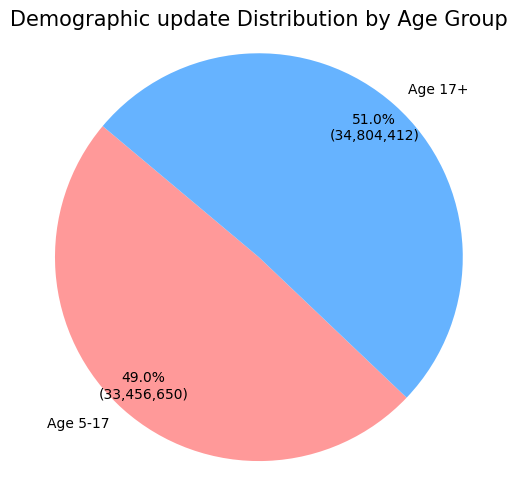

In [35]:
import matplotlib.pyplot as plt

# 1. Define the data
labels = ['Age 5-17', 'Age 17+']
sizes = [33456647, 34804412]
total = sum(sizes)

# 2. Define a function to format the labels
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    # Returns a string with percentage and the absolute value in brackets
    return f"{pct:.1f}%\n({absolute:,})"

# 3. Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sizes, 
    labels=labels, 
    autopct=lambda pct: func(pct, sizes), # Use the custom function here
    startangle=140, 
    colors=['#ff9999','#66b3ff','#99ff99'],
    pctdistance=0.85 # Moves the text slightly outward for better readability
)


plt.title('Demographic update Distribution by Age Group', fontsize=15)
plt.axis('equal') 
plt.tight_layout()
plt.show()

“The biometric update workload is almost evenly distributed between the 5–17 and 17+ age groups, with adults contributing 51% and minors 49% of total updates. This balanced distribution reflects continuous biometric maintenance needs across the entire population, driven by biometric maturation in children and identity corrections or updates in adults.”


👶 Strong presence of children updates

A 49% share from the 5–17 group highlights continuous Aadhaar updating during growth years, confirming:

- Biometric drift during childhood is a major operational load

- Schools, enrollment drives, and correction campaigns are likely contributors


🏗 Operational implication for UIDAI

Infrastructure and manpower must be balanced between:

- Child biometric re-capture programs

- Adult correction/update services

This is not a “child-only” or “adult-only” workload system.

#### total biographic updates in states

In [36]:

statewise_sum = df.groupby('state_clean')[['bio_age_5_17', 'bio_age_17_', 'total_biometric']].sum()

In [36]:
# This moves 'state_clean' from the index to a normal column
final_df = statewise_sum.reset_index()
final_df.to_csv('../Data/Grouped_data/statewise_data_biographic.csv', index=False)

In [ ]:
statewise_sum = statewise_sum.sort_values(by='total_biometric', ascending=False)
statewise_sum


,bio_age_5_17,bio_age_17_,total_biometric
state_clean,,,
Uttar Pradesh,6076420,3290663,9367083
Maharashtra,3437083,5583627,9020710
Madhya Pradesh,3148670,2671066,5819736
Bihar,2160544,2618424,4778968
Tamil Nadu,2153303,2418849,4572152
Rajasthan,2032783,1895214,3927997
Andhra Pradesh,2181567,1429209,3610776
Gujarat,1437932,1709956,3147888
Karnataka,1228292,1373795,2602087


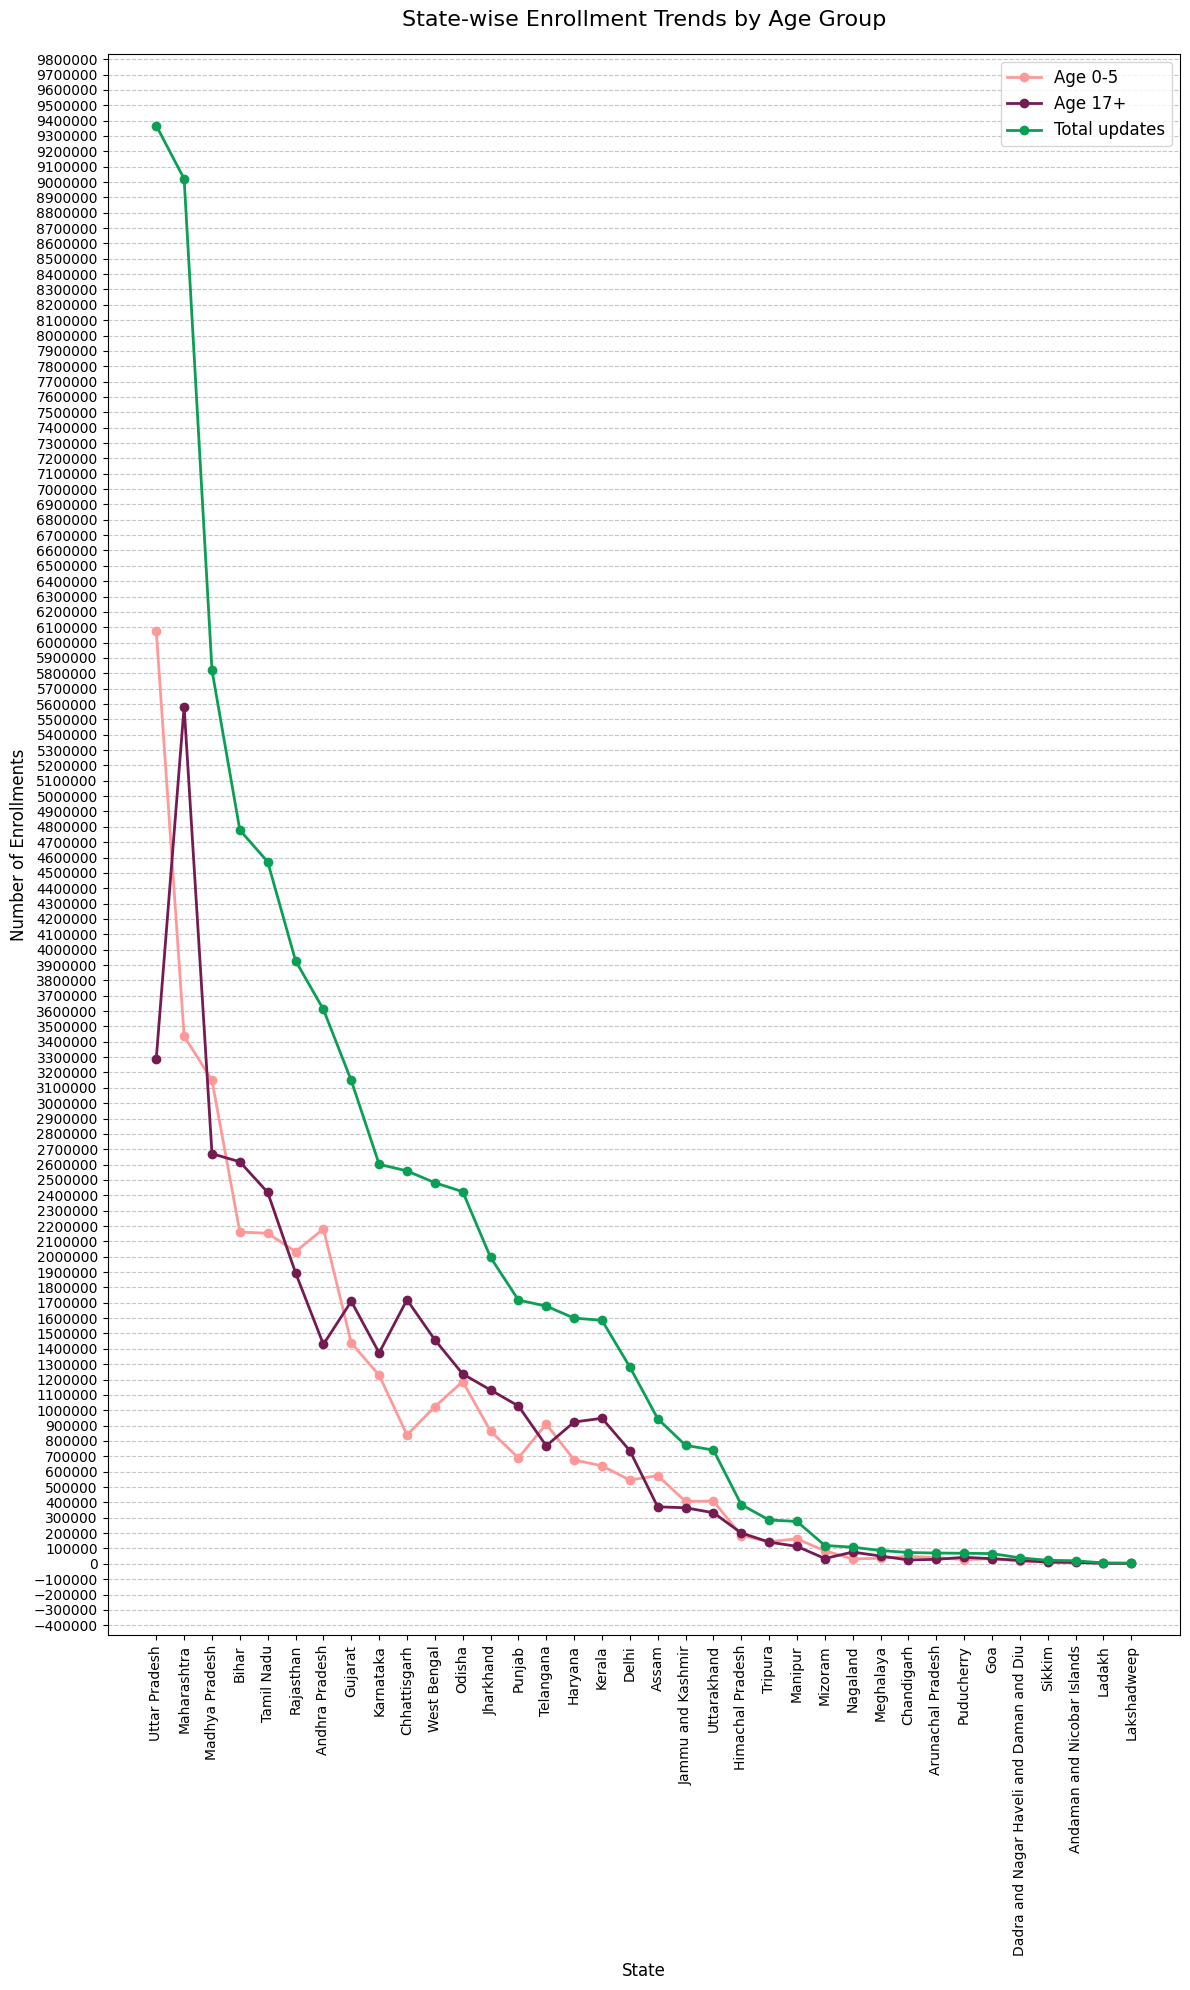

In [50]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# 1. Prepare the data
state_names = statewise_sum.index.astype(str).tolist()

# 2. Create the Line Chart
fig, ax = plt.subplots(figsize=(12, 20))

# Plot lines for each age group
ax.plot(state_names, statewise_sum['bio_age_5_17'], label='Age 0-5', color='#ff9999', marker='o', linewidth=2)
ax.plot(state_names, statewise_sum['bio_age_17_'], label='Age 17+', color="#741B52", marker='o', linewidth=2)
ax.plot(state_names, statewise_sum['total_biometric'], label='Total updates', color="#0b9f55", marker='o', linewidth=2)


# 3. SET THE Y-AXIS GAP TO 20,000
# This replaces the default 100,000 step with your requested 20,000 step
ax.yaxis.set_major_locator(MultipleLocator(100000))

# 4. Formatting for Exact Numbers (No Scientific Notation)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

# 5. Customize the Plot
ax.set_title('State-wise Enrollment Trends by Age Group', fontsize=16, pad=20)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Enrollments', fontsize=12)

# Rotate labels to prevent overlap
plt.xticks(rotation=90, fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

State-wise biometric update demand is highly skewed, with Uttar Pradesh and Maharashtra together contributing over one-fourth of national activity. (Together they contribute ~26.5% of India’s total biometric updates.)

However, age-group dominance varies significantly by region: northern and eastern states show stronger child-biometric demand, whereas industrialized and migration-heavy states show adult-dominant update patterns. 

This suggests that Aadhaar service deployment should be customized regionally, with child enrollment infrastructure prioritized in states like Uttar Pradesh and Assam, and adult correction/update services strengthened in Maharashtra, Kerala, and Chhattisgarh.


Age Group Dominance Patterns 

Look at contrasting states:

State	                Dominant Group	                Interpretation
Uttar Pradesh	    5–17 (60.7L vs 32.9L)	    High child biometric refresh activity
Maharashtra	17+     (55.8L vs 34.3L)	        Adult mobility & correction dominant
Chhattisgarh	    17+	                        Adult-centric update demand
Kerala	            17+	                        High adult migration & ID updates
Assam	            5–17	                    School-age biometric focus


So:

Different states show different biometric behavior profiles:

- Some are child-dominant (UP, Assam)

- Some are adult-dominant (Maharashtra, Kerala, Chhattisgarh)

- This show a behavioral pattern


Population Size Effect (Expected Trend)

High-ranking states: Uttar Pradesh , Maharashtra , Madhya Pradesh , Bihar , Tamil Nadu

These are also among India’s most populous states.

Trend:

- Biometric update volume is strongly correlated with population size.

#### total biographic updates in districts

In [41]:

districtwise_sum = df.groupby(
    ['state_clean', 'district_clean']
)[['bio_age_5_17', 'bio_age_17_', 'total_biometric']].sum().sort_values(by='total_biometric', ascending=False)
print(districtwise_sum.head(50))

                                  bio_age_5_17  bio_age_17_  total_biometric
state_clean    district_clean                                               
Maharashtra    Pune                     277443       316149           593592
               Nashik                   208401       353492           561893
               Thane                    198145       361166           559311
Andhra Pradesh East Godavari            333357       172080           505437
Delhi          North East Delhi         206613       253211           459824
West Bengal    North 24 Parganas        196323       245703           442026
Gujarat        Ahmedabad                164009       250431           414440
Maharashtra    Jalgaon                  145699       262402           408101
               Mumbai                   116741       278332           395073
Bihar          East Champaran           168002       202450           370452
Maharashtra    Ahmadnagar               161523       197643           359166

Aadhaar biometric update demand is highly concentrated at the district level, not just the state level. A small number of urban–semiurban districts act as national workload hubs.

District-wise analysis reveals extreme spatial concentration of Aadhaar biometric update demand, with Pune, Nashik, and Thane emerging as the highest workload centers nationally. 

Maharashtra alone dominates the top-ranked districts, highlighting strong urban-driven adult biometric activity. 

In contrast, districts in Uttar Pradesh and Andhra Pradesh exhibit pronounced child-dominant patterns, suggesting high biometric refresh requirements during growth years. 

Metro districts consistently show adult-centric updates, reflecting mobility, address changes, and occupational migration. These contrasting district-level behavioral signatures emphasize the need for region-specific Aadhaar service planning rather than uniform national deployment.

#### this Data created for just predictive model for 
- in this we can predict district wise monthly prediction of biometric update

In [40]:

districtwise_sum_monthly = df.groupby(['state_clean', 'district_clean',df['date'].dt.to_period('M')])[['total_biometric']].sum()
# .sort_values(by='total_enrollments', ascending=False)
districtwise_sum_monthly

total_biometric
state_clean                 district_clean date                    
Andaman and Nicobar Islands Andamans       2025-03              209
                                           2025-04              184
                                           2025-05              180
                                           2025-06              140
                                           2025-07              259
...                                                             ...
West Bengal                 Uttar Dinajpur 2025-11             9976
                                           2025-12             8625
                            West Medinipur 2025-09                1
                                           2025-11                1
                                           2025-12                2

[7309 rows x 1 columns]

In [41]:
# This moves 'state_clean' from the index to a normal column
final_dff = districtwise_sum_monthly.reset_index()
final_dff.to_csv('../Data/predictive_data/districtwise_sum_monthly_bio.csv', index=False)

#### total biographic updates in different pincodes

In [ ]:
pincode_total = (
    df.groupby('pincode')['total_biometric']
      .sum()
      .reset_index()
      .sort_values('total_biometric', ascending=False)
)
print(pincode_total.head(100))


      pincode  total_biometric
6903   431001            79754
91     110094            77326
2676   244001            75926
83     110086            64957
2849   247001            59694
...       ...              ...
850    151001            27328
6873   425412            27284
8250   493773            26904
2055   221001            26771
82     110085            26752

[100 rows x 2 columns]


### Trends based on dates

#### Monthly biographic updates in country 

In [ ]:
monthwise_sum = df.groupby( df['date'].dt.to_period('M'))[['bio_age_5_17', 'bio_age_17_', 'total_biometric']].sum()
monthwise_sum


,bio_age_5_17,bio_age_17_,total_biometric
date,,,
2025-03,3733578,4588644,8322222
2025-04,4356896,4284783,8641679
2025-05,3868247,4011709,7879956
2025-06,3710149,4189140,7899289
2025-07,4499057,5293495,9792552
2025-09,3545070,2968437,6513507
2025-10,2041493,2192361,4233854
2025-11,3344597,3426207,6770804
2025-12,4357560,3849636,8207196


In [ ]:
# this data store for further multi-variate analysis with demographic and enrollment data
# This moves 'state_clean' from the index to a normal column
final_df = monthwise_sum.reset_index()
final_df.to_csv('../Data/Grouped_data/monthwise_data_biographic.csv', index=False)

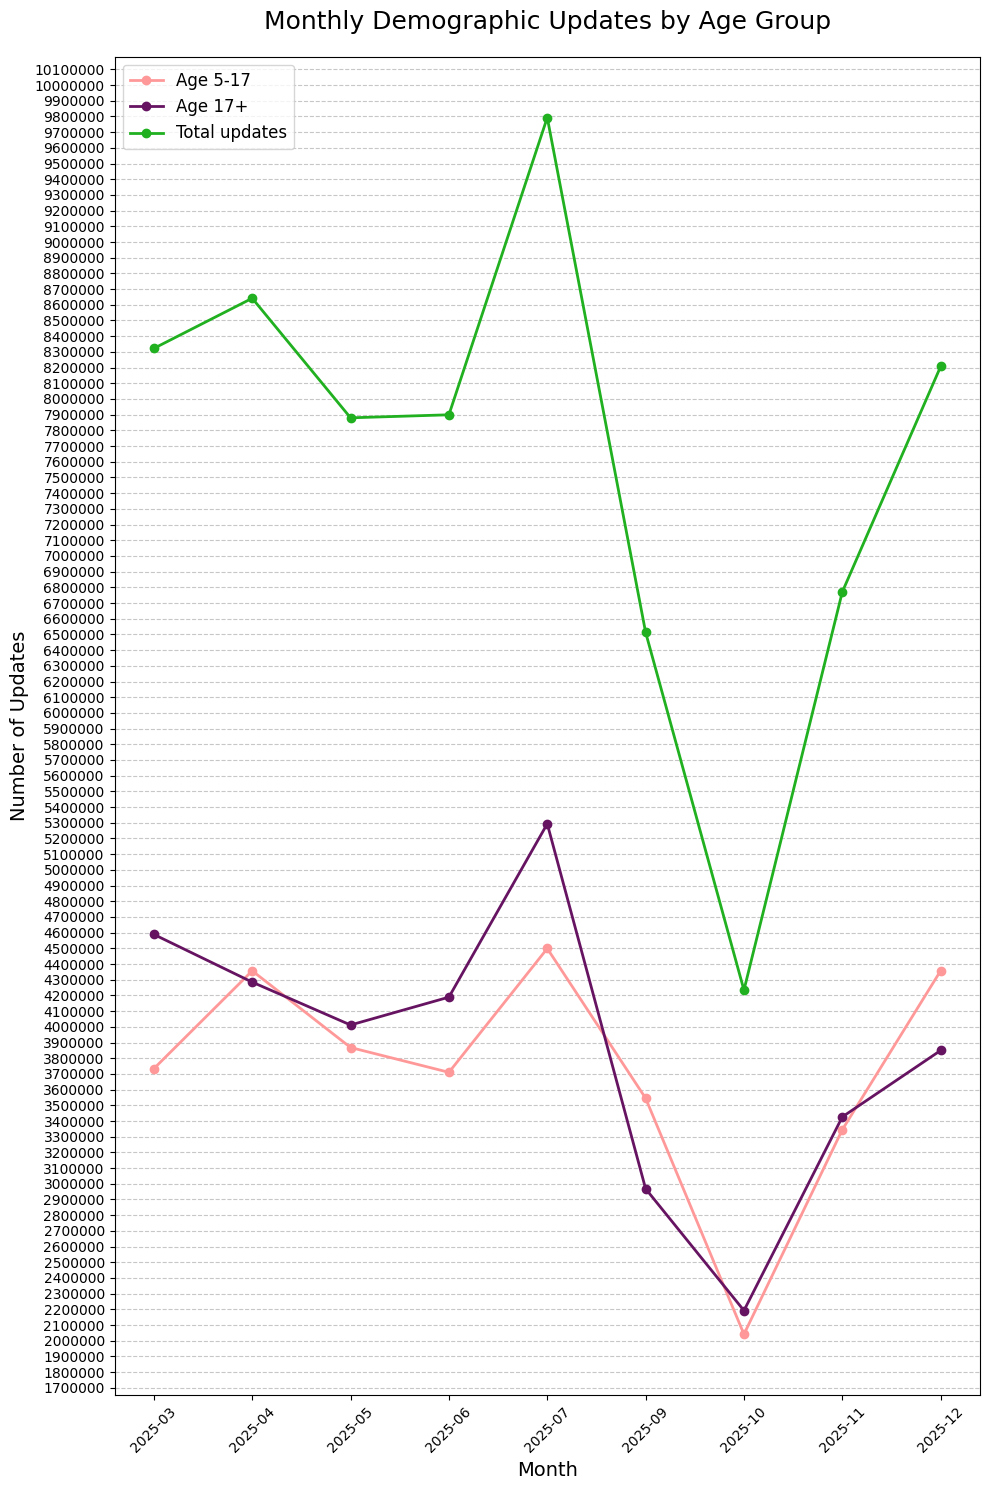

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# 1. Prepare the data
# We assume 'monthwise_sum' is your DataFrame indexed by month
dates = monthwise_sum.index.astype(str).tolist()

# 2. Create the Line Chart
fig, ax = plt.subplots(figsize=(10, 15))

# Plot lines for each age group
ax.plot(dates, monthwise_sum['bio_age_5_17'], label='Age 5-17', color='#ff9999', marker='o', linewidth=2)
ax.plot(dates, monthwise_sum['bio_age_17_'], label='Age 17+', color="#661461", marker='o', linewidth=2)
ax.plot(dates, monthwise_sum['total_biometric'], label='Total updates', color="#20b020", marker='o', linewidth=2)

# 3. Set the Y-axis interval to 30,000
ax.yaxis.set_major_locator(MultipleLocator(100000))

# 4. Format for Exact Numbers (No Scientific Notation)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

# 5. Customize the Plot appearance
ax.set_title('Monthly Demographic Updates by Age Group', fontsize=18, pad=20)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Updates', fontsize=14)

# Rotate date labels for better fit
plt.xticks(rotation=45, fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()

Monthly biometric update totals reveal two distinct data-generation regimes. 
- From March to July 2025, the dataset contains only single-day monthly snapshots, 
- whereas from September onwards it transitions to near-continuous daily reporting. 
- August 2025 is entirely missing, indicating a data gap. 
- Consequently, raw month-to-month totals are not directly comparable across the entire timeline. Within the continuous reporting phase (September–December), biometric activity shows a dip in October followed by a strong recovery in November and December, suggesting increased Aadhaar update demand toward the end of the year. 
- Age-wise patterns indicate adult-dominant activity during high-volume snapshot months, while child updates gain relative prominence in later months

#### Monthly biographic updates in statewise 

In [44]:
# statewise monthwise sum
state_monthwise_sum = df.groupby(['state_clean', df['date'].dt.to_period('M')])[['bio_age_5_17', 'bio_age_17_', 'total_biometric']].sum()

# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(state_monthwise_sum)
state_monthwise_sum # comment this if uncommented above

bio_age_5_17  bio_age_17_  \
state_clean                 date                                 
Andaman and Nicobar Islands 2025-03          1612         1091   
                            2025-04          1630         1114   
                            2025-05           982          913   
                            2025-06           845         1099   
                            2025-07          1095         1733   
...                                           ...          ...   
West Bengal                 2025-07        190774       229187   
                            2025-09        117790       158982   
                            2025-10         63055       114587   
                            2025-11         88870       171232   
                            2025-12        116101       135345   

                                     total_biometric  
state_clean                 date                      
Andaman and Nicobar Islands 2025-03             2703  
                            2025-04             2744  
                            2025-05             1895  
                            2025-06             1944  
                            2025-07             2828  
...                                              ...  
West Bengal                 2025-07           419961  
                            2025-09           276772  
                            2025-10           177642  
                            2025-11           260102  
                            2025-12           251446  

[324 rows x 3 columns]

State-month level analysis reveals both structural and behavioral dynamics in Aadhaar biometric updates. 

A nationwide shift from snapshot-based reporting (March–July) to continuous daily logging (September onward) is evident across all states. 

Maharashtra remains the national operational hub throughout, while Uttar Pradesh consistently shows child-dominant biometric activity. 

October 2025 marks a synchronized national low point in biometric updates, likely driven by operational slowdown or festive season effects, followed by a strong recovery in November and December. C

ertain states, such as Rajasthan in September, exhibit localized surges, suggesting targeted biometric drives. 

Southern states like Tamil Nadu and Karnataka show stable, balanced demographic participation, indicating mature Aadhaar service infrastructure.

#### day by day no of updates

In [46]:
national_daily = (
    df.groupby('date')['total_biometric']
      .sum()
      .reset_index()
      .sort_values('date')
)
# uncomment below lines to see full output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(national_daily)
national_daily # comment this if uncommented above

,date,total_biometric
0,2025-03-01,8322222
1,2025-04-01,8641679
2,2025-05-01,7879956
3,2025-06-01,7899289
4,2025-07-01,9792552
...,...,...
84,2025-12-25,505095
85,2025-12-26,424939
86,2025-12-27,415687
87,2025-12-28,143084


Daily national Aadhaar biometric update volumes stabilize between 2.5–5 lakh records per day under normal operations. 

However, the dataset contains multiple classes of anomalies: 
1. early-month snapshot days with unrealistically high totals caused by batch aggregation, 
2. several dates with implausibly low counts indicating partial ingestion or ETL failures, and 
3. consistent weekend/holiday drops reflecting operational downtime. Peak operational loads are observed in late November and early December, crossing 5 lakh updates per day, likely due to backlog clearance and year-end compliance activities

#### Statistical Measures

In [47]:
df[['bio_age_5_17','bio_age_17_','total_biometric']].describe()

,bio_age_5_17,bio_age_17_,total_biometric
count,1.766212e+06,1.766212e+06,1.766212e+06
mean,1.894260e+01,1.970568e+01,3.864828e+01
std,8.581746e+01,9.030576e+01,1.664470e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.000000e+00
50%,4.000000e+00,4.000000e+00,8.000000e+00
75%,1.100000e+01,1.000000e+01,2.200000e+01
max,8.002000e+03,7.625000e+03,1.338100e+04


In [48]:
# Skewness
print("skewness:")
print(df[['bio_age_5_17','bio_age_17_','total_biometric']].skew())

print("\nkurtosis:")
print(df[['bio_age_5_17','bio_age_17_','total_biometric']].kurtosis())

skewness:
bio_age_5_17       18.880437
bio_age_17_        17.645562
total_biometric    16.498364
dtype: float64

kurtosis:
bio_age_5_17       676.044598
bio_age_17_        579.876284
total_biometric    511.303753
dtype: float64


All biometric update variables exhibit extreme right skewness (skewness > 16) and exceptionally high kurtosis (> 500), indicating a highly heavy-tailed distribution. 

This shows that Aadhaar biometric activity is dominated by a very small number of high-volume spatial–temporal clusters, while the majority of records represent low update counts. 

Consequently, classical statistical assumptions of normality do not hold, and robust statistics such as medians, percentiles, and log-scaled visualizations are essential for meaningful analysis.

Median values are tiny:

- bio_age_5_17 → 4

- bio_age_17_ → 4

- total_biometric → 8

But maximum values are huge:

- total_biometric → 13,381

So most rows represent very small activity, while a few rows represent massive spikes.

This already hints at extreme skewness.


In statistics:

- Skewness ≈ 0 → symmetric

- Skewness > 1 → highly right-skewed

- our values > 16 → extreme right skew

Meaning:

Almost all observations are small, but a very small number of rows contain extremely large biometric counts.

This matches Aadhaar reality:

- Most pincode–district–date entries have few updates

- A few urban hubs or bulk-upload days dominate volume


In statistics:
- Normal distribution kurtosis ≈ 3

- Even 10 is considered very heavy-tailed.

- our kurtosis > 500 is astronomical.

Meaning:

- The dataset has extremely heavy tails and extreme outliers. Rare, massive update events dominate variance.

This is consistent with:

- Batch uploads

- National snapshot days

- Mega-districts like Pune, Thane, UP districts

- ETL artifacts you detected earlier